In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/yiche/Desktop/Python/iris_csv.csv')
print(df.head())
print(df['class'].unique())

versicolor_petal_length = df[df['class']=='Iris-versicolor']['petallength']
setosa_petal_length = df[df['class']=='Iris-setosa']['petallength']
virginica_petal_length = df[df['class']=='Iris-virginica']['petallength']
versicolor_petal_width = df[df['class']=='Iris-versicolor']['petalwidth']
setosa_petal_width = df[df['class']=='Iris-setosa']['petalwidth']
virginica_petal_width = df[df['class']=='Iris-virginica']['petalwidth']

   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# Histogram 

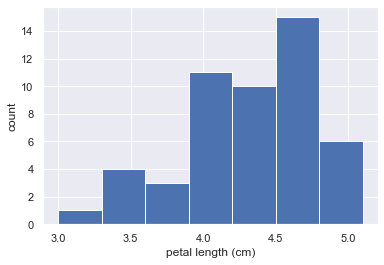

In [37]:
sns.set()

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

# Bee swarm plot

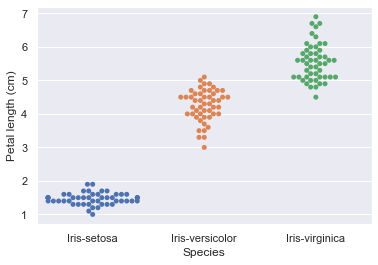

In [38]:
# Create bee swarm plot with Seaborn's default setting
sns.swarmplot(x='class', y='petallength', data=df)

# Label the axes
plt.xlabel('Species')
plt.ylabel('Petal length (cm)')

# Show the plot
plt.show()

# Empirical cumulative distribution function (ECDF)
Define your own function:

In [40]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

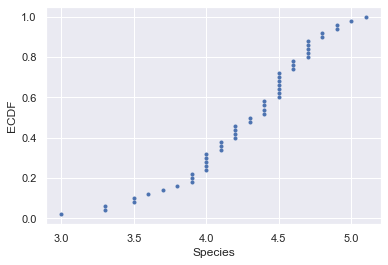

In [41]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers, marker= '.', linestyle = 'none')

# Label the axes
plt.xlabel('Species')
plt.ylabel('ECDF')

# Display the plot
plt.show()

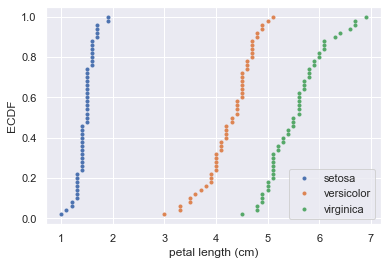

In [42]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker= '.', linestyle = 'none')
_ = plt.plot(x_vers, y_vers, marker= '.', linestyle = 'none')
_ = plt.plot(x_virg, y_virg, marker= '.', linestyle = 'none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# Box-and-whisker plot

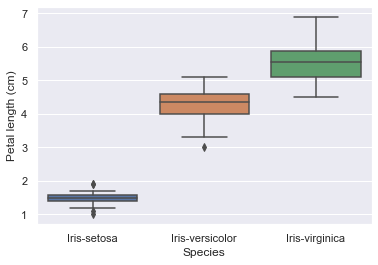

In [44]:
# Create box plot with Seaborn's default settings
sns.boxplot('class', 'petallength', data=df)

# Label the axes
plt.xlabel('Species')
plt.ylabel('Petal length (cm)')

# Show the plot
plt.show()

# Computing the means, medium and percentile

In [45]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

I. versicolor: 4.26 cm
[3.3    4.     4.35   4.6    4.9775]


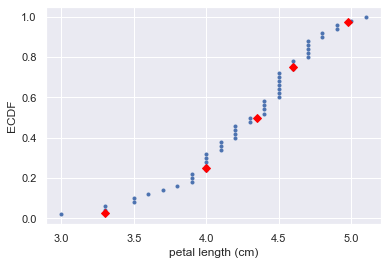

In [46]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')

# Show the plot
plt.show()

# The standard deviation and the variance

In [48]:
# Compute the variance: variance
print(np.var(versicolor_petal_length))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.21640000000000012
0.4651881339845204


# Scatter plots

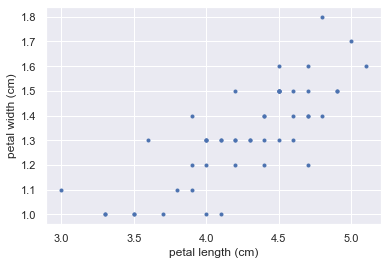

In [51]:
# Make a scatter plot
plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none' )

# Label the axes
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# Show the result
plt.show()

In [58]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print('covariance_matrix:\n',covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print('covariance:', petal_cov)

covariance_matrix:
 [[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
covariance: 0.07310204081632653


# Pearson correlation coefficient

In [59]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169
